In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix , classification_report  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve , auc
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
# Load the dataset
df = pd.read_csv('inf.csv')
df = df.drop(['Unnamed: 0'],axis = 1)

In [3]:
# Split the data into features and target variable
X = df.drop(['Pathogen Test Result'],axis = 1)
Y = df['Pathogen Test Result']

In [4]:
# Split the data into training and testing sets
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size= 0.2, random_state=2)

In [5]:
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [6]:
Y_pred = classifier.predict(X_test)

In [7]:
cm= confusion_matrix(Y_test, Y_pred) 

array([[1387,  349],
       [ 464, 1504]], dtype=int64)

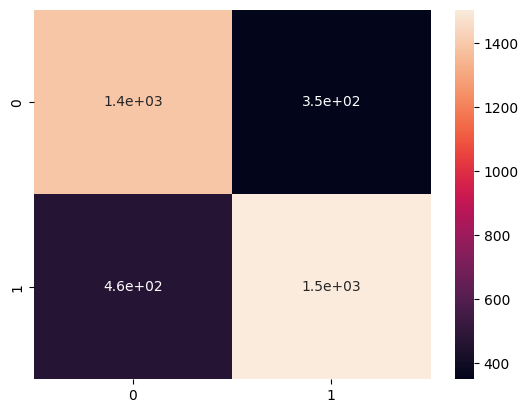

In [8]:
snb.heatmap(cm,annot=True)
cm

In [9]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1736
           1       0.81      0.76      0.79      1968

    accuracy                           0.78      3704
   macro avg       0.78      0.78      0.78      3704
weighted avg       0.78      0.78      0.78      3704



In [10]:
# for sensitivity and specificity
tn, fp, fn, tp = cm.ravel()

In [11]:
specificity = tn / (tn+fp)
print('specificity for data is : ',round(specificity*100,2),'%')

specificity for data is :  79.9 %


In [12]:
sensitivity = tp / (tp+fn)
print('sensitivity for data is : ',round(sensitivity*100,2),'%')

sensitivity for data is :  76.42 %


In [13]:
#ROC and AUC
fpr, tpr, threshold = roc_curve(Y_test,Y_pred)
roc_auc = auc(fpr, tpr)

In [14]:
print('Area under curve : ',round(roc_auc*100,2),'%')

Area under curve :  78.16 %


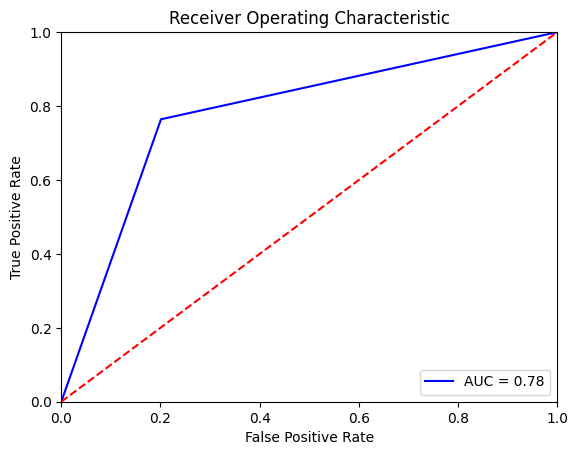

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()